# Startup

In [1]:
from BFCalc.BFInterp import DM_spectrum_setup
from BFCalc.createspectragrids import singlechannel_diffflux, getspectrafunc, darkmatterdoubleinput
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from scipy import special,stats
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm
import os, sys
import functools
from multiprocessing import Pool, freeze_support
import multiprocessing
sys.path.append("BFCalc")


/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,


In [2]:

offsettruemeshpsf, offsetreconmeshpsf, logetruemeshpsf = np.meshgrid(offsetaxistrue, offsetaxis, log10eaxistrue)
psfnormalisations = special.logsumexp(psf(offsetreconmeshpsf.flatten(), offsettruemeshpsf.flatten(), logetruemeshpsf.flatten()).reshape(offsetreconmeshpsf.shape),axis=0)

logetruemeshedisp, logereconmeshedisp, offsettruemeshedisp,  = np.meshgrid(log10eaxistrue, log10eaxis, offsetaxistrue)
edispnormalisations = special.logsumexp(edisp(logereconmeshedisp.flatten(), logetruemeshedisp.flatten(), offsettruemeshedisp.flatten()).reshape(logereconmeshedisp.shape),axis=0)

In [3]:
np.where(psfnormalisations ==-np.inf)

(array([], dtype=int64), array([], dtype=int64))

In [4]:
print(log10eaxistrue[np.where(psfnormalisations ==-np.inf)[1]])
assert [] == list(np.where(psfnormalisations ==-np.inf)[1])

[]


In [5]:
np.where(edispnormalisations ==-np.inf)

(array([], dtype=int64), array([], dtype=int64))

In [6]:
print(log10eaxistrue[np.where(edispnormalisations ==-np.inf)[0]])
assert [] == list(np.where(edispnormalisations ==-np.inf)[1])


[]


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_14250/1996773168.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')
/Users/lpin0002/Desktop/DMPipe/BFCalc/createspectragrids.py:107: RuntimeWarning: divide by zero encountered in log
  return np.log(twodinterpolationfunc(logmDM, logenergy-logmDM))


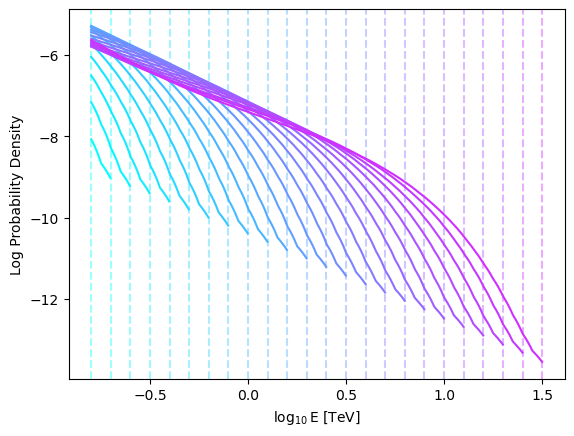

In [7]:
startlogmassval = log10eaxistrue[0]
endlogmassval = log10eaxistrue[-1]
examplelogmassvals = np.linspace(startlogmassval,endlogmassval,int((endlogmassval-startlogmassval)*10)+1)
colormap = cm.get_cmap('cool')

plt.figure()
for logmassval in examplelogmassvals:
    linecolor = colormap((logmassval+0.7)/2.7)
    plt.plot(log10eaxistrue, darkmatterdoubleinput(logmassval, log10eaxistrue), c=linecolor)
    plt.axvline(logmassval, ls="--",alpha=0.4, c=linecolor)
plt.xlabel(r'$\log_{10}$E [TeV]')
plt.ylabel('Log Probability Density')
plt.show()

In [8]:
array1d = np.array([np.pi, np.e, np.sqrt(5),-100])
array2d = np.array([[[0,0,0,0],
                     [1,1,1,1]],
                    
                    [[-1,-1,-1,-1],
                     [2,2,2,2]],
                    
                    [[0.5,0.5,0.5,0.5],
                     [4,4,4,4]]]).T

result = array2d + array1d[:,np.newaxis,np.newaxis]
print(array2d.shape)
print(result.shape)
print(result.T)

(4, 2, 3)
(4, 2, 3)
[[[   3.14159265    2.71828183    2.23606798 -100.        ]
  [   4.14159265    3.71828183    3.23606798  -99.        ]]

 [[   2.14159265    1.71828183    1.23606798 -101.        ]
  [   5.14159265    4.71828183    4.23606798  -98.        ]]

 [[   3.64159265    3.21828183    2.73606798  -99.5       ]
  [   7.14159265    6.71828183    6.23606798  -96.        ]]]


In [9]:
energyarray1d = np.array([1, 2, 3])
offsetarray1d = np.array([0,1,2])

result = energyarray1d[np.newaxis,:]+offsetarray1d[:,np.newaxis] 
print(result.shape)
print(result)

(3, 3)
[[1 2 3]
 [2 3 4]
 [3 4 5]]


# Test and Setup

In [10]:
offsetvals = np.linspace(-3.5,3.5,8)
logevals = np.linspace(-1,2,31)
offsetvalsmesh, logevalsmesh = np.meshgrid(offsetaxis, log10eaxis)


colormap = cm.get_cmap('coolwarm')

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_14250/1171364216.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


In [11]:
logetruemeshedisp, logereconmeshedisp, offsettruemeshedisp,  = np.meshgrid(log10eaxistrue, log10eaxis, offsetaxistrue)
edispnormalisations = special.logsumexp(edisp(logereconmeshedisp.flatten(), logetruemeshedisp.flatten(), offsettruemeshedisp.flatten()).reshape(logereconmeshedisp.shape).T +logjacob,axis=2)

In [12]:
edispnormalisations.shape

(8, 920)

In [13]:
special.logsumexp(edisp(log10eaxis, log10eaxistrue[2], offsetaxistrue[0])-edispnormalisations[0,2]+logjacob)

5.898059818321144e-17

In [14]:
print(log10eaxis.shape)
print(log10eaxistrue.shape)
print(offsetaxistrue.shape)

(12,)
(920,)
(8,)


In [15]:
# edispmatrix = np.empty(shape=(log10eaxis.shape[0], log10eaxis.shape[0]))

# for ii, log10eval in notebook_tqdm(enumerate(log10eaxis), total=log10eaxis.shape[0]):
#     edispmatrix[ii,:] = edisp(log10eaxis, log10eval, 1.5)



In [16]:
# plt.figure()
# plt.pcolor(log10eaxis, log10eaxis, edispmatrix, vmin=np.max(edispmatrix)-5, vmax = np.max(edispmatrix))
# plt.colorbar()
# plt.show()

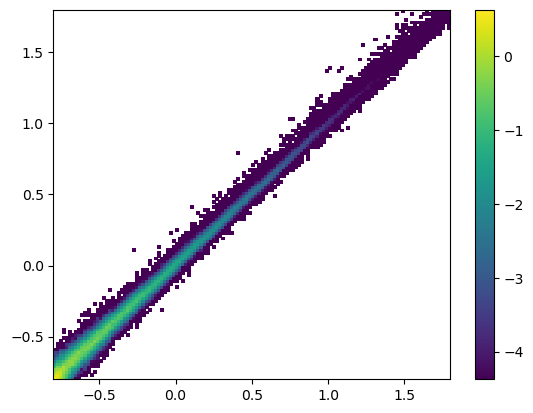

In [17]:
# psfmatrix = np.empty(shape=(offsetaxis.shape[0], offsetaxis.shape[0]))

# for ii, offsetval in notebook_tqdm(enumerate(offsetaxis), total=offsetaxis.shape[0]):
#     psfmatrix[ii,:] = psf(offsetaxis, offsetval, -0.9)

In [18]:
# plt.figure()
# plt.pcolor(offsetaxis, offsetaxis, psfmatrix)
# plt.show()

# Simulation

## Simulation Setup

In [19]:
log10emesh, offsetmesh = np.meshgrid(log10eaxis, offsetaxis)
log10emeshtrue, offsetmeshtrue = np.meshgrid(log10eaxistrue, offsetaxistrue)

numberoftruevaluesamples = int(1e4)
Nsamples=numberoftruevaluesamples
truelambda = 0.5
nsig = int(round(truelambda*Nsamples))
nbkg = int(round((1-truelambda)*Nsamples))

truelogmassval = 0.0

In [20]:
sigpriorvalues = []
signaldistribution = setup_full_fake_signal_dist(truelogmassval, specfunc=darkmatterdoubleinput)

sigpriorvalues = np.squeeze(signaldistribution(log10emeshtrue, offsetmeshtrue).T)


In [21]:
bkgpriorvalues = np.squeeze(bkgdist(log10emeshtrue, offsetmeshtrue).T)

/Users/lpin0002/Desktop/DMPipe/utils.py:130: RuntimeWarning: divide by zero encountered in log
  return np.log(bkgfull.evaluate(energy=10**logeval*u.TeV, offset=np.abs(offsetval)*2*u.deg).value)


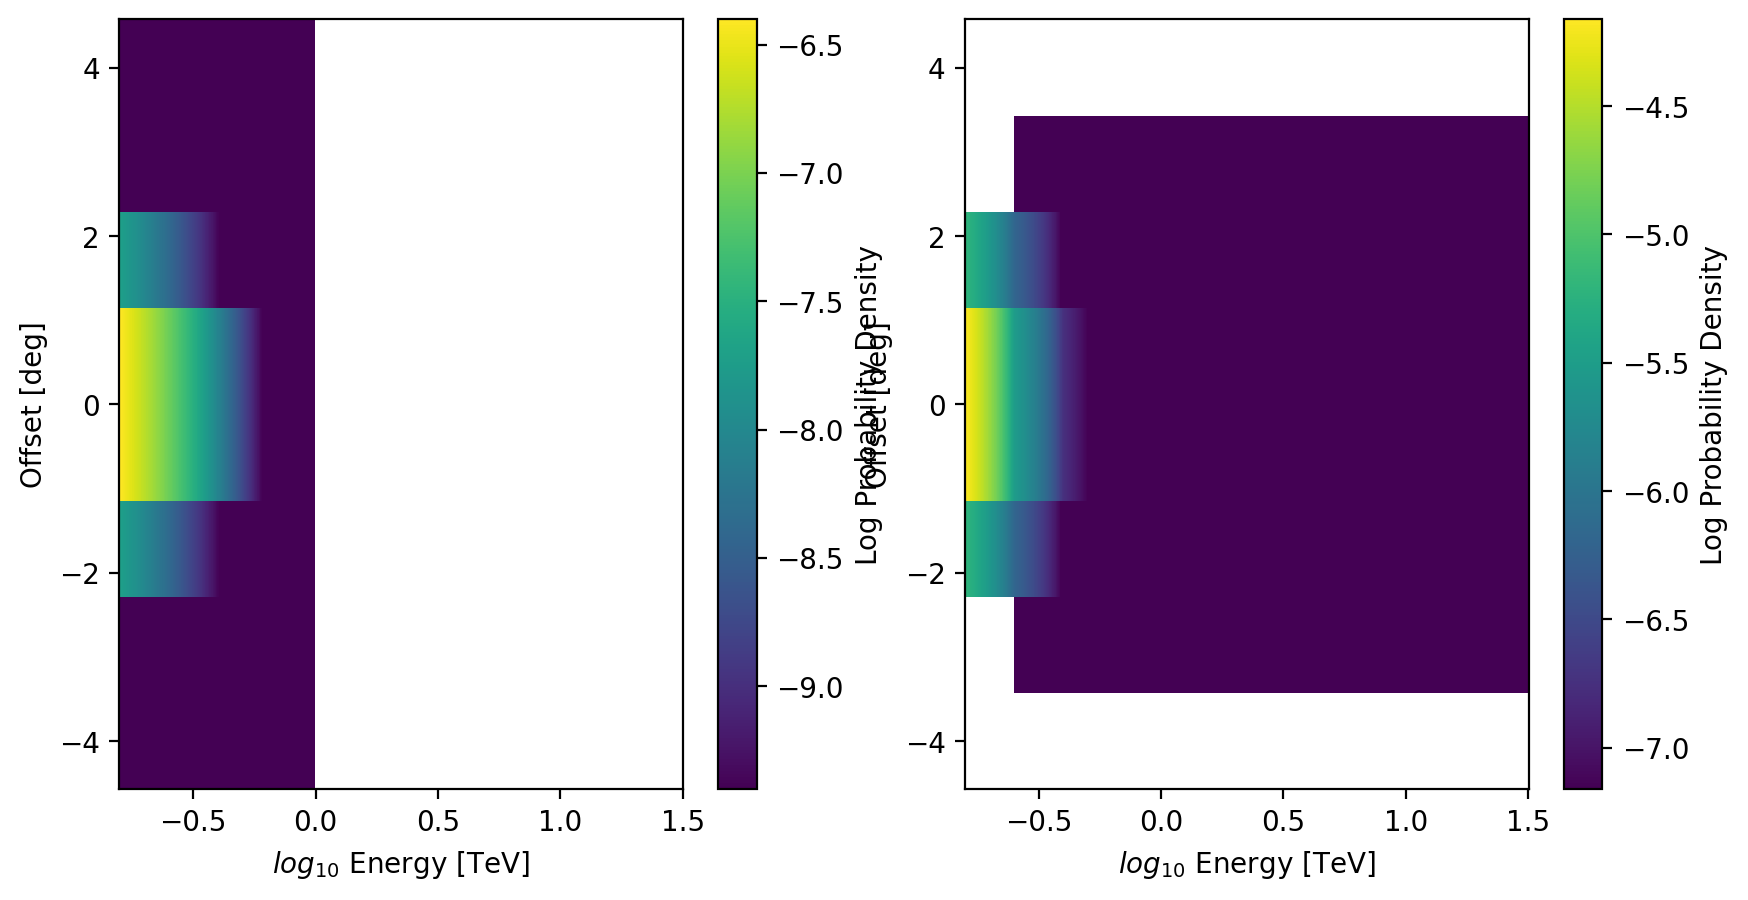

In [22]:
plt.figure(figsize=(10,5), dpi=200)
plt.subplot(1,2,1)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, sigpriorvalues.T, vmin=np.max(sigpriorvalues)-3, vmax=np.max(sigpriorvalues))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')


plt.subplot(1,2,2)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, bkgpriorvalues.T, vmin=np.max(bkgpriorvalues)-3, vmax=np.max(bkgpriorvalues))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')

In [23]:
sigbinnedprior = sigpriorvalues.T+logjacobtrue
flattened_sigbinnedprior = sigbinnedprior.flatten()


bkgbinnedprior = bkgpriorvalues.T+logjacobtrue
flattened_bkgbinnedprior = bkgbinnedprior.flatten()

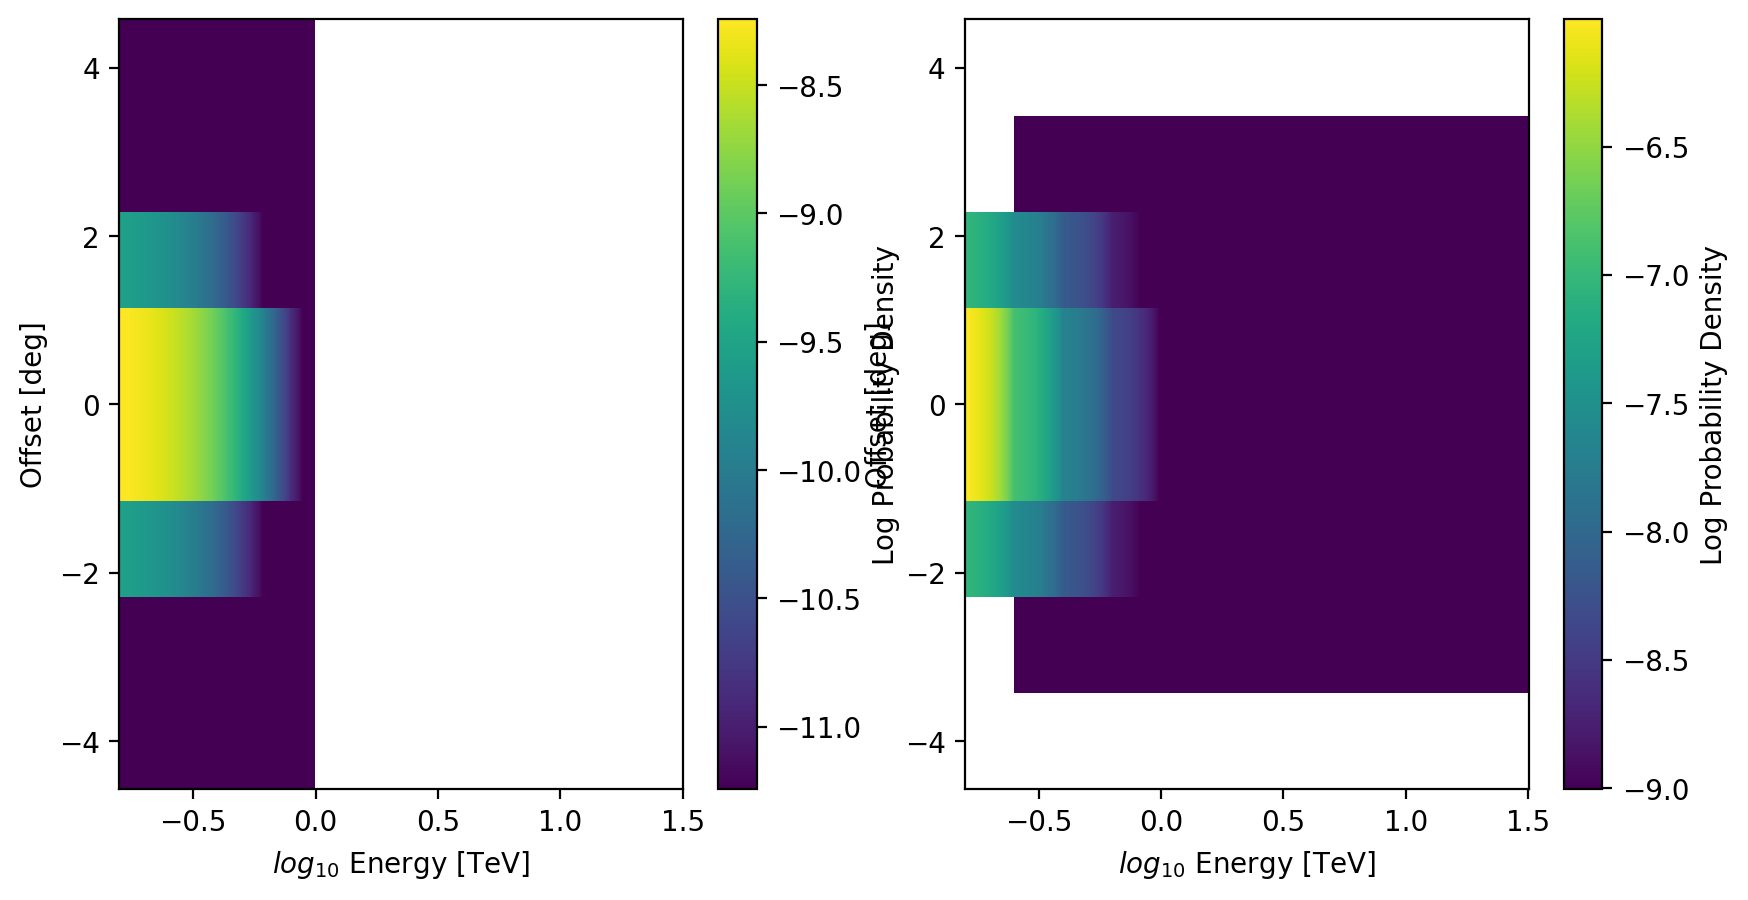

In [24]:
plt.figure(figsize=(10,5), dpi=200)
plt.subplot(1,2,1)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, sigbinnedprior, vmin=np.max(sigbinnedprior)-3, vmax=np.max(sigbinnedprior))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')


plt.subplot(1,2,2)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, bkgbinnedprior, vmin=np.max(bkgbinnedprior)-3, vmax=np.max(bkgbinnedprior))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')

## Checking prior normalisations

In [25]:
special.logsumexp(sigbinnedprior)

-2.232278387886792

In [26]:
bkgnormalisation = special.logsumexp(bkgbinnedprior)

bkgbinnedprior = bkgbinnedprior - bkgnormalisation

bkgnormalisation

-0.1891478599363161

## Signal Simulation

In [27]:
sigresultindices = np.unravel_index(inverse_transform_sampling(flattened_sigbinnedprior, Nsamples=nsig),sigbinnedprior.shape)
siglogevals = log10eaxistrue[sigresultindices[1]]
sigoffsetvals = offsetaxistrue[sigresultindices[0]]

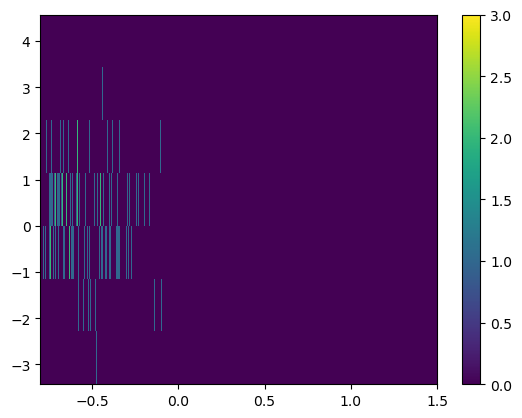

In [28]:
plt.figure()
plt.hist2d(siglogevals, sigoffsetvals, bins=[log10eaxistrue, offsetaxistrue+0.5*(offsetaxistrue[1]-offsetaxistrue[0])])
# for val in offsetaxis+0.5*(offsetaxis[1]-offsetaxis[0]):
#     plt.axhline(val, alpha=0.1, c='tab:orange')
plt.colorbar()
plt.show()

In [29]:
signal_log10e_measured = log10eaxis[np.squeeze([inverse_transform_sampling(edisp(log10eaxis, logeval, offsetval)+logjacob, Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(siglogevals, sigoffsetvals), total=nsig)])]

100%|██████████| 250/250 [00:00<00:00, 1451.74it/s]


In [30]:
signal_offset_measured = offsetaxis[np.squeeze([inverse_transform_sampling(psf(offsetaxis, offsetval, logeval), Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(siglogevals, sigoffsetvals), total=nsig)])]


100%|██████████| 250/250 [00:01<00:00, 140.55it/s]


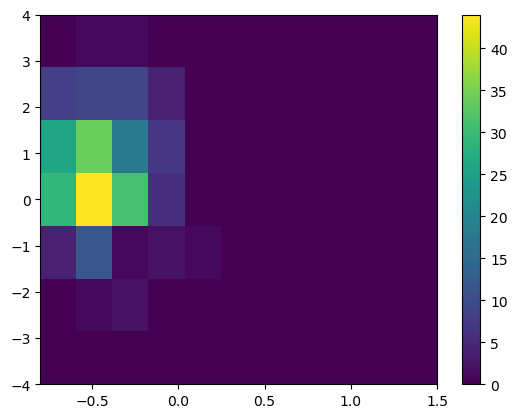

250.0

In [31]:
plt.figure()
histvals = plt.hist2d(signal_log10e_measured, signal_offset_measured, bins=[log10eaxis, offsetaxis])
plt.colorbar()
plt.show()

np.sum(histvals[0])

## Background Simulations

In [32]:
bkgresultindices = np.unravel_index(inverse_transform_sampling(flattened_bkgbinnedprior, Nsamples=nbkg),sigbinnedprior.shape)
bkglogevals = log10eaxistrue[bkgresultindices[1]]
bkgoffsetvals = offsetaxistrue[bkgresultindices[0]]

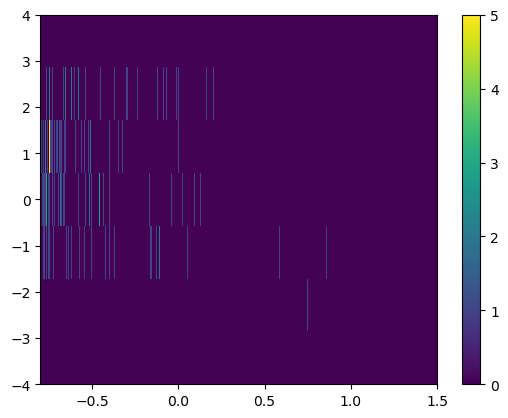

In [33]:
plt.figure()
plt.hist2d(bkglogevals, bkgoffsetvals, bins=[log10eaxistrue, offsetaxistrue])
plt.colorbar()
plt.show()

In [34]:
bkg_log10e_measured = log10eaxis[np.squeeze([inverse_transform_sampling(edisp(log10eaxis, logeval, offsetval)+logjacob, Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(bkglogevals, bkgoffsetvals), total=nbkg)])]

100%|██████████| 250/250 [00:00<00:00, 1643.00it/s]


In [35]:
bkg_offset_measured = offsetaxis[np.squeeze([inverse_transform_sampling(psf(offsetaxis, offsetval, logeval), Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(bkglogevals, bkgoffsetvals), total=nbkg)])]


100%|██████████| 250/250 [00:01<00:00, 148.56it/s]


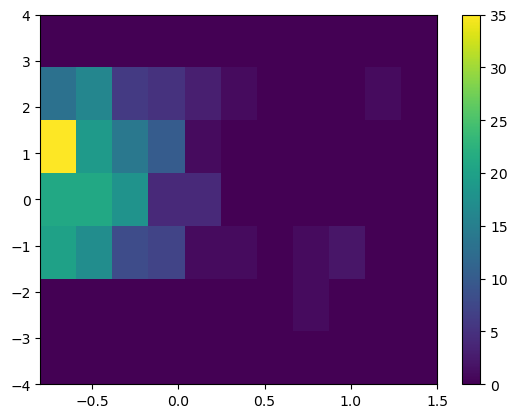

250.0

In [36]:
plt.figure()
histvals = plt.hist2d(bkg_log10e_measured, bkg_offset_measured, bins=[log10eaxis, offsetaxis])
plt.colorbar()
plt.show()

np.sum(histvals[0])

# Nuisance Parameter Marginalisation

## Setup

Hello

In [37]:
sigdistsetup = setup_full_fake_signal_dist
# Makes it so that when np.log(0) is called a warning isn't raised as well as other errors stemming from this.
np.seterr(divide='ignore', invalid='ignore')


true_offset_vals             = np.array(list(sigoffsetvals)+list(bkgoffsetvals))
measured_offset_vals         = np.array(list(signal_offset_measured)+list(bkg_offset_measured))
true_log10e_vals             = np.array(list(siglogevals)+list(bkglogevals))
measured_log10e_vals         = np.array(list(signal_log10e_measured)+list(bkg_log10e_measured))

numcores                = 10


nbinslogmass            = 201
logmasswindowwidth      = 5/np.sqrt(nsig)

nbinslambda             = 201
lambdawindowwidth       = 8/np.sqrt(Nsamples)


logmasslowerbound       = truelogmassval-logmasswindowwidth
logmassupperbound       = truelogmassval+logmasswindowwidth


lambdalowerbound        = truelambda-lambdawindowwidth
lambdaupperbound        = truelambda+lambdawindowwidth


if logmasslowerbound<log10eaxis[0]:
    logmasslowerbound = log10eaxis[0]
if logmassupperbound>2:
    logmassupperbound = 2
        
        
if lambdalowerbound<0:
    lambdalowerbound = 0
if lambdaupperbound>1:
    lambdaupperbound = 1


logmassrange            = np.linspace(logmasslowerbound, logmassupperbound, nbinslogmass)    
lambdarange             = np.linspace(lambdalowerbound, lambdaupperbound, nbinslambda)

## Calculating IRF probability densities

In [38]:
testvalue = calcirfvals([measured_log10e_vals[0], measured_offset_vals[0]])
print(testvalue)
irfvals = []
with Pool(numcores) as pool: 
        for result in notebook_tqdm(pool.imap(calcirfvals, zip(measured_log10e_vals, measured_offset_vals)), 
                            total=len(list(measured_log10e_vals)), ncols=100, desc="Calculating irfvals"):
                irfvals.append(result)

        pool.close() 

[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]


Calculating irfvals:   0%|                                                  | 0/500 [00:00<?, ?it/s]/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWa

## Signal Marginalisations

In [39]:
testevaluateformass = evaluateformass(truelogmassval, irfvals=irfvals[0], specfunc=darkmatterdoubleinput)


produce_logsigmarg_function = functools.partial(evaluateformass, irfvals=irfvals, specfunc=darkmatterdoubleinput)
signal_log_marginalisationvalues = []
with Pool(numcores) as pool: 
        
        for result in notebook_tqdm(pool.imap(produce_logsigmarg_function, logmassrange), total=len(list(logmassrange)), ncols=100, desc="Calculating signal marginalisations..."):
                signal_log_marginalisationvalues.append(result)

        pool.close() 
signal_log_marginalisationvalues = np.array(signal_log_marginalisationvalues)
signal_log_marginalisationvalues.shape

Calculating signal marginalisations...:   0%|                               | 0/201 [00:00<?, ?it/s]/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/BFCalc/createspectragrids.py:107: RuntimeWarning: divide by zero encountered in log
  return np.log(twodinterpolationfunc(logmDM, logenergy-logmDM))
Calculating signal marginalisations...: 

(201, 500)

## Background Marginalisations

In [40]:
produce_logbkgmarg_function = functools.partial(evaluateintegral, priorvals=bkgpriorvalues.T-bkgnormalisation)

bkg_log_marginalisationvalues = []
with Pool(numcores) as pool: 
        for result in notebook_tqdm(pool.imap(produce_logbkgmarg_function, irfvals), total=len(list(irfvals)), ncols=100, desc="Calculating background marginalisations..."):
                bkg_log_marginalisationvalues.append(result)

        pool.close() 
bkg_log_marginalisationvalues = np.array(bkg_log_marginalisationvalues)
bkg_log_marginalisationvalues.shape

Calculating background marginalisations...:   0%|                           | 0/500 [00:00<?, ?it/s]/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWa

(500,)

# Calculating hyperparameter posterior

In [41]:
logposterior = []

for ii, logmass in notebook_tqdm(enumerate(logmassrange), total=len(list(logmassrange))):
    singlerow = np.sum(np.logaddexp(np.log(lambdarange)[np.newaxis,:]+signal_log_marginalisationvalues[ii,:][:,np.newaxis], 
                                    np.log(1-lambdarange)[np.newaxis,:]+bkg_log_marginalisationvalues[:,np.newaxis]),axis=0)
    logposterior.append(singlerow)
logposterior = np.array(logposterior)

normalisedlogposterior = logposterior-special.logsumexp(logposterior)

100%|██████████| 201/201 [00:00<00:00, 451.64it/s]


# Analysing results

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_14250/2242854871.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Blues_r', 4)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_14250/2242854871.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  extracolormap = cm.get_cmap('Blues_r')


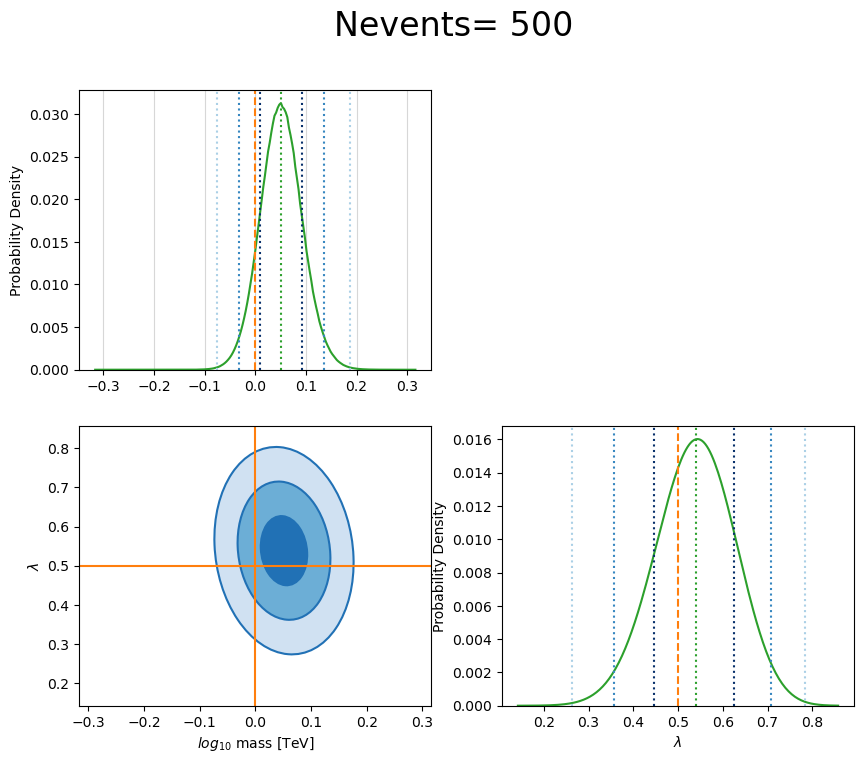

In [50]:
from utils import confidence_ellipse
from scipy.stats import norm

import time

colormap = cm.get_cmap('Blues_r', 4)

fig, ax = plt.subplots(2,2, dpi=100, figsize=(10,8))
plt.suptitle(f"Nevents= {Nsamples}", size=24)

# Upper left plot
logmass_logposterior = special.logsumexp(normalisedlogposterior, axis=1)

normalisedlogmassposterior = np.exp(logmass_logposterior-special.logsumexp(logmass_logposterior))

cdflogmassposterior = np.cumsum(normalisedlogmassposterior)
mean = logmassrange[np.abs(norm.cdf(0)-cdflogmassposterior).argmin()]
zscores = [-3, -2,-1,1,2, 3]
logmasspercentiles = []
for zscore in zscores:
    logmasspercentiles.append(logmassrange[np.abs(norm.cdf(zscore)-cdflogmassposterior).argmin()])


ax[0,0].plot(logmassrange,normalisedlogmassposterior, c='tab:green')

ax[0,0].axvline(mean, c='tab:green', ls=':')


for o, percentile in enumerate(logmasspercentiles):
            color = colormap(np.abs(zscores[o])/4-0.01)

            ax[0,0].axvline(percentile, c=color, ls=':')
ax[0,0].axvline(truelogmassval, ls='--', color="tab:orange")
ax[0,0].grid(axis='x', markevery=log10eaxistrue, alpha=0.5)
ax[0,0].set_ylabel('Probability Density')
ax[0,0].set_ylim([0, None])


# Upper right plot
ax[0,1].axis('off')


# Lower left plot
# ax[1,0].pcolormesh(logmassrange, lambdarange, np.exp(normalisedlogposterior).T, cmap='Blues')
ax[1,0].axvline(truelogmassval, c='tab:orange')
ax[1,0].axhline(truelambda, c='tab:orange')
ax[1,0].set_xlabel(r'$log_{10}$ mass [TeV]')
ax[1,0].set_ylabel(r'$\lambda$')

ax[1,0].set_ylim([lambdarange[0], lambdarange[-1]])
ax[1,0].set_xlim([logmassrange[0], logmassrange[-1]])

extracolormap = cm.get_cmap('Blues_r')
confidence_ellipse(logmassrange, lambdarange, np.exp(normalisedlogposterior).T, ax[1,0], n_std=3.0, facecolor=extracolormap(0.8), linewidth=1.5, edgecolor=extracolormap(0.25))
confidence_ellipse(logmassrange, lambdarange, np.exp(normalisedlogposterior).T, ax[1,0], n_std=2.0, facecolor=extracolormap(0.5), linewidth=1.5, edgecolor=extracolormap(0.25))
confidence_ellipse(logmassrange, lambdarange, np.exp(normalisedlogposterior).T, ax[1,0], n_std=1.0, facecolor=extracolormap(0.25), linewidth=1.5, edgecolor=extracolormap(0.25))


lambda_logposterior = special.logsumexp(normalisedlogposterior, axis=0)

normalisedlambdaposterior = np.exp(lambda_logposterior-special.logsumexp(lambda_logposterior))

cdflambdaposterior = np.cumsum(normalisedlambdaposterior)
meanlabda = lambdarange[np.abs(norm.cdf(0)-cdflambdaposterior).argmin()]
lambdapercentiles = []
for zscore in zscores:
    lambdapercentiles.append(lambdarange[np.abs(norm.cdf(zscore)-cdflambdaposterior).argmin()])


ax[1,1].plot(lambdarange,normalisedlambdaposterior, c='tab:green')

ax[1,1].axvline(meanlabda, c='tab:green', ls=':')


for o, percentile in enumerate(lambdapercentiles):
            color = colormap(np.abs(zscores[o])/4-0.01)

            ax[1,1].axvline(percentile, c=color, ls=':')
ax[1,1].axvline(truelambda, ls='--', color="tab:orange")
ax[1,1].set_xlabel(r'$\lambda$')
ax[1,1].set_ylabel('Probability Density')
ax[1,1].set_ylim([0, None])
plt.show()

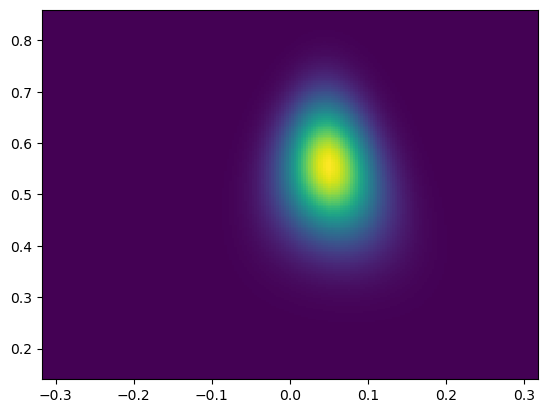

In [43]:
plt.figure()
plt.pcolormesh(logmassrange, lambdarange, np.exp(normalisedlogposterior).T)
plt.show()

## Brute Force Version

In [44]:
from brutesampler import brutedynesty

In [45]:
irfvals = np.array(irfvals)
irfvals.shape

(500, 8, 920)

In [46]:
irfvals[:10000,:,:].shape

(500, 8, 920)

In [47]:
samplerresults = brutedynesty(darkmatterdoubleinput, bkgdist, irfvals)

/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:62: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:50: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(1

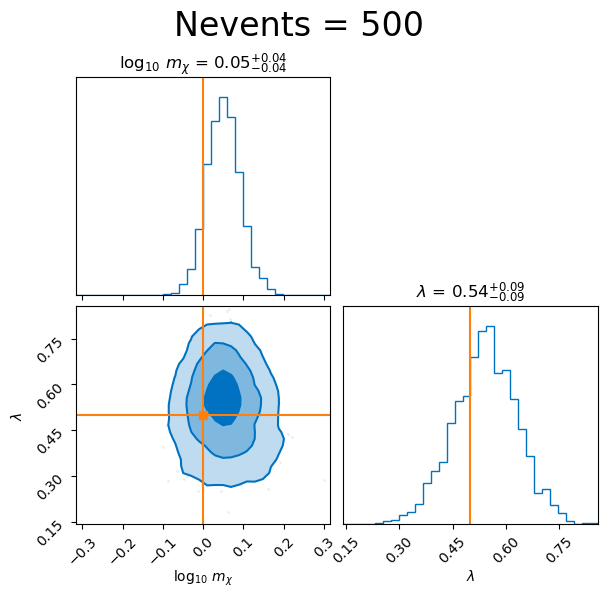

In [51]:

from corner import corner
from time import strftime

figure = corner(
                samplerresults.samples_equal(),
                levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                labels=[r"log$_{10}$ $m_\chi$", r"$\lambda$"],
                show_titles=True,
                title_kwargs={"fontsize": 12},
                bins = [32,32],
                truths=[truelogmassval, truelambda],
                labelpad=-0.1,
                tick_kwargs={'rotation':90},
                color='#0072C1',
                truth_color='tab:orange',
                plot_density=0, 
                plot_datapoints=True, 
                fill_contours=True,
                max_n_ticks=7,
                hist_kwargs=dict(density=True),
                smooth=0.9,
                range = [(logmasslowerbound, logmassupperbound),(lambdalowerbound, lambdaupperbound)]
    )
figure.set_size_inches(7,6)
figure.set_dpi(100)
plt.suptitle(f'Nevents = {Nsamples}', y=1.04, size=24)
# plt.savefig(strftime(f'Figures/bruteforce_2d_{truelogmassval}_{truelambda}_{Nsamples}_%m%d_%H%M.pdf'))
# plt.savefig(strftime(f'Figures/bruteforce_2d_{truelogmassval}_{truelambda}_{Nsamples}_%m%d_%H%M.png'))
plt.show()